In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings

# Evitar advertencias de deprecación de Pandas (opcional)
warnings.filterwarnings('ignore', category=FutureWarning)

In [49]:
# Especifico la ruta del archivo excel
homicidios = 'homicidios.xlsx'

# Especifico el nombre de la hoja a leer
nombre_de_hoja = 'HECHOS'

# Utilizo la funcion de pandas para leer la hoja específica del excel
hechos = pd.read_excel(homicidios, sheet_name=nombre_de_hoja)

# Se normalizan los nombres, se llevan a minusculas y se reemplazan los espacios por guiones bajos
hechos = hechos.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [50]:
# Especifico la ruta del archivo excel
homicidios = 'homicidios.xlsx'

# Especifico el nombre de la hoja a leer
nombre_de_hoja = 'VICTIMAS'

# Utilizo la funcion de pandas para leer la hoja específica del excel
victimas = pd.read_excel(homicidios, sheet_name=nombre_de_hoja)

# Se normalizan los nombres de las columnas, se llevan a minusculas y se reemplazan los espacios por guiones bajos
victimas = victimas.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [51]:
hechos.dtypes

id                               object
n_victimas                        int64
fecha                    datetime64[ns]
aaaa                              int64
mm                                int64
dd                                int64
hora                             object
hh                               object
lugar_del_hecho                  object
tipo_de_calle                    object
calle                            object
altura                          float64
cruce                            object
dirección_normalizada            object
comuna                            int64
xy_(caba)                        object
pos_x                            object
pos_y                            object
participantes                    object
victima                          object
acusado                          object
dtype: object

In [52]:
# Se procede a verificar los nulos de cada columna.
hechos.isna().sum()

id                         0
n_victimas                 0
fecha                      0
aaaa                       0
mm                         0
dd                         0
hora                       0
hh                         0
lugar_del_hecho            0
tipo_de_calle              0
calle                      1
altura                   567
cruce                    171
dirección_normalizada      8
comuna                     0
xy_(caba)                  0
pos_x                      0
pos_y                      0
participantes              0
victima                    0
acusado                    0
dtype: int64

Se procede a verificar los nulos de cada columna True.

In [53]:
hechos[hechos['calle'].isna()]

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,altura,cruce,dirección_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Se observa que la fila 119 no aporta datos suficientes o utiles por lo que se procede a eliminarla.

In [54]:
# Se elimina la fila 119
hechos.drop(index=119, inplace=True)

In [55]:
hechos[hechos['altura'].isna()]

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,altura,cruce,dirección_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,2021-0091,1,2021-12-11,2021,12,11,23:00:00,23,BAIGORRIA Y VICTOR HUGO,CALLE,...,NaN,"HUGO, VICTOR","BAIGORRIA y HUGO, VICTOR",10,Point (94810.03686085 100710.80080255),-58.51989389,-34.62284918,MOTO-AUTO,MOTO,AUTO
690,2021-0092,1,2021-12-12,2021,12,12,06:20:00,6,AV. RIVADAVIA Y AV. PUEYRREDON,AVENIDA,...,NaN,PUEYRREDON AV.,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO


In [56]:
altura_nula = hechos['altura'].isna().sum()

altura_nonula = hechos['altura'].notna().sum()

print(f'La columna "altura" posee {altura_nula} registros nulos y {altura_nonula} registros no nulos')

La columna "altura" posee 566 registros nulos y 129 registros no nulos


Los registros nulos en la columna altura corresponden a siniestros ocurridos en un cruce, se podría eliminar la columna Altura o desestimar ya que no aporta un dato de valor y posee un mayor porcentaje de nulos, por el momento, se completaran los nulos con 'SD' (sin dato).

In [57]:
# Se rellenan los nulos de la columna 'altura' con 'SD'
hechos['altura'] = hechos['altura'].fillna('SD')

In [58]:
altura_nula = hechos['cruce'].isna().sum()

altura_nonula = hechos['cruce'].notna().sum()

print(f'La columna "cruce" posee {altura_nula} registros nulos y {altura_nonula} registros no nulos')

La columna "cruce" posee 170 registros nulos y 525 registros no nulos


In [59]:
hechos[hechos['cruce'].isna()]

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,altura,cruce,dirección_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
9,2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,...,1366.0,NaN,ENTRE RIOS AV. 1366,1,Point (106616.41069662 100496.44662323),-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO
14,2016-0020,1,2016-02-17,2016,2,17,16:00:00,16,SUIPACHA 156,CALLE,...,156.0,NaN,SUIPACHA 156,1,Point (107684.31807562 102519.17333314),-58.37952223,-34.60653282,PEATON-AUTO,PEATON,AUTO
33,2016-0047,1,2016-04-15,2016,4,15,05:30:00,5,LIMA 1483,CALLE,...,1483.0,NaN,LIMA 1483,1,Point (107412.19098904 100391.02557777),-58.38247061,-34.62571878,PEATON-PASAJEROS,PEATON,PASAJEROS
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,SD,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2021-0082,1,2021-11-06,2021,11,6,04:39:00,4,AU 25 DE MAYO KM7 (ALTURA PASCO),AUTOPISTA,...,SD,NaN,AUTOPISTA 25 DE MAYO y PASCO,3,Point (106179.07517962 100523.29161457),-58.39591856,-34.62453459,MOTO-AUTO,MOTO,AUTO
685,2021-0087,1,2021-11-27,2021,11,27,11:22:00,11,ESMERALDA 1359,CALLE,...,1359.0,NaN,ESMERALDA 1359,1,Point (107829.16426745 104166.84427133),-58.37795815,-34.59167894,PEATON-BICICLETA,PEATON,BICICLETA
687,2021-0089,1,2021-12-02,2021,12,2,01:10:00,1,AV. GAONA 3655,AVENIDA,...,3655.0,NaN,GAONA AV. 3655,11,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


En contraposición a lo observado en la columna 'Altura', en la columna 'Cruce' los valores nulos corresponden a siniestros que ocurrieron en una altura especifica y no en un cruce. Se procede a rellenar los nulos con 'SD'

In [60]:
hechos['cruce'] = hechos['cruce'].fillna('SD')

In [61]:
hechos[hechos['dirección_normalizada'].isna()]

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,altura,cruce,dirección_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,SD,SD,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,SD,SD,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,SD,SD,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,SD,SD,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,SD,SD,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,SD,SD,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,SD,SD,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


In [62]:
# Se rellenan los nulos de la columna 'dirección_normalizada' con los datos de la columna 'lugar_del_hecho'
hechos['dirección_normalizada'] = hechos['dirección_normalizada'].fillna(hechos['lugar_del_hecho'])

Se han verificado y tratado los valores nulos encontrados. En su mayoria, la falta de los datos correspondía a la naturaleza del mismo, por ejemplo, se hallaron registros de siniestros viales en autopista, por lo que los campos correspondientes a columnas como altura de la calle, cruce o dirección normalizada van a ser campos vacios. Por esta razón se optó por rellenar los nulos con la abreviatura de 'sin dato', SD. 

In [63]:
# Se verifican los datos de la columna 'comuna'
hechos['comuna'].value_counts()

comuna
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      1
Name: count, dtype: int64

Se observan un registro 0 en la columna 'comuna', dado que CABA está organizada en 15 comunas por ley, se procede a verificar el dato.

In [64]:
# Se ubica el registro igual a 0 en la columna comuna.
hechos[hechos['comuna']== 0]

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,altura,cruce,dirección_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,SD,SD,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD


In [65]:
victimas[victimas['id_hecho']== '2016-0174']

,id_hecho,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento
141,2016-0174,2016-12-27,2016,12,27,SD,SD,SD,SD,SD


In [66]:
# Se utiliza el metodo drop para eliminar el id '2016-0174'
hechos.drop(hechos[hechos['id'] == '2016-0174'].index, inplace=True)


victimas.drop(victimas[victimas['id_hecho'] == '2016-0174'].index, inplace=True)

Se verifica que el valor 0 en la columna 'comuna' corresponde a información faltante en relación al hecho registrado. Tambien se verifica que no solo falta el registro de la comuna, tambien hay faltante de información en la posición geográfica y sobre los participantes.

Se ha intentado encontrar datos útiles en la hoja de 'victimas' para poder combinarlos con los datos faltantes en el id '2016-0174' pero se han hallado incompletos por lo que se procede a eliminar la fila por no tener suficientes datos relevantes.

In [67]:
victimas_xComuna = pd.pivot_table(hechos, index='comuna', values='victima', aggfunc='count')

print('Listado de victimas por comuna:')
print(victimas_xComuna)

Listado de victimas por comuna:
        victima
comuna         
1            90
2            25
3            45
4            76
5            22
6            21
7            60
8            65
9            73
10           29
11           32
12           37
13           40
14           35
15           44


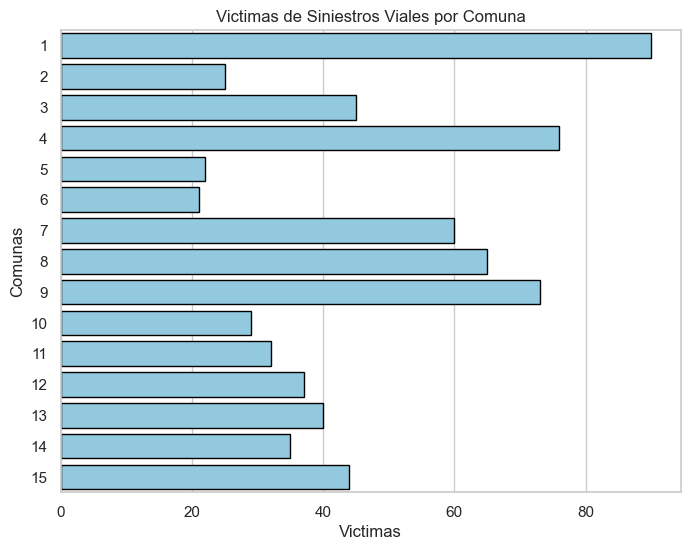

In [68]:
# Se configura el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Se crea un countplot (histograma de frecuencias)
plt.figure(figsize=(8, 6))
sns.countplot(data=hechos, y='comuna', color='skyblue', edgecolor='black')

# Se añade etiquetas y título
plt.xlabel('Victimas')
plt.ylabel('Comunas')  # Cambiado de 'Datos' a 'Comuna'
plt.title('Victimas de Siniestros Viales por Comuna')

# Se muestra el gráfico
plt.show()

Se realiza un histograma para visualizar la distribución de victimas por comuna, distinguiendo facilmente que las comunas 1,4,7,8 y 9 son las que registran mayor cantidad de siniestros viales.

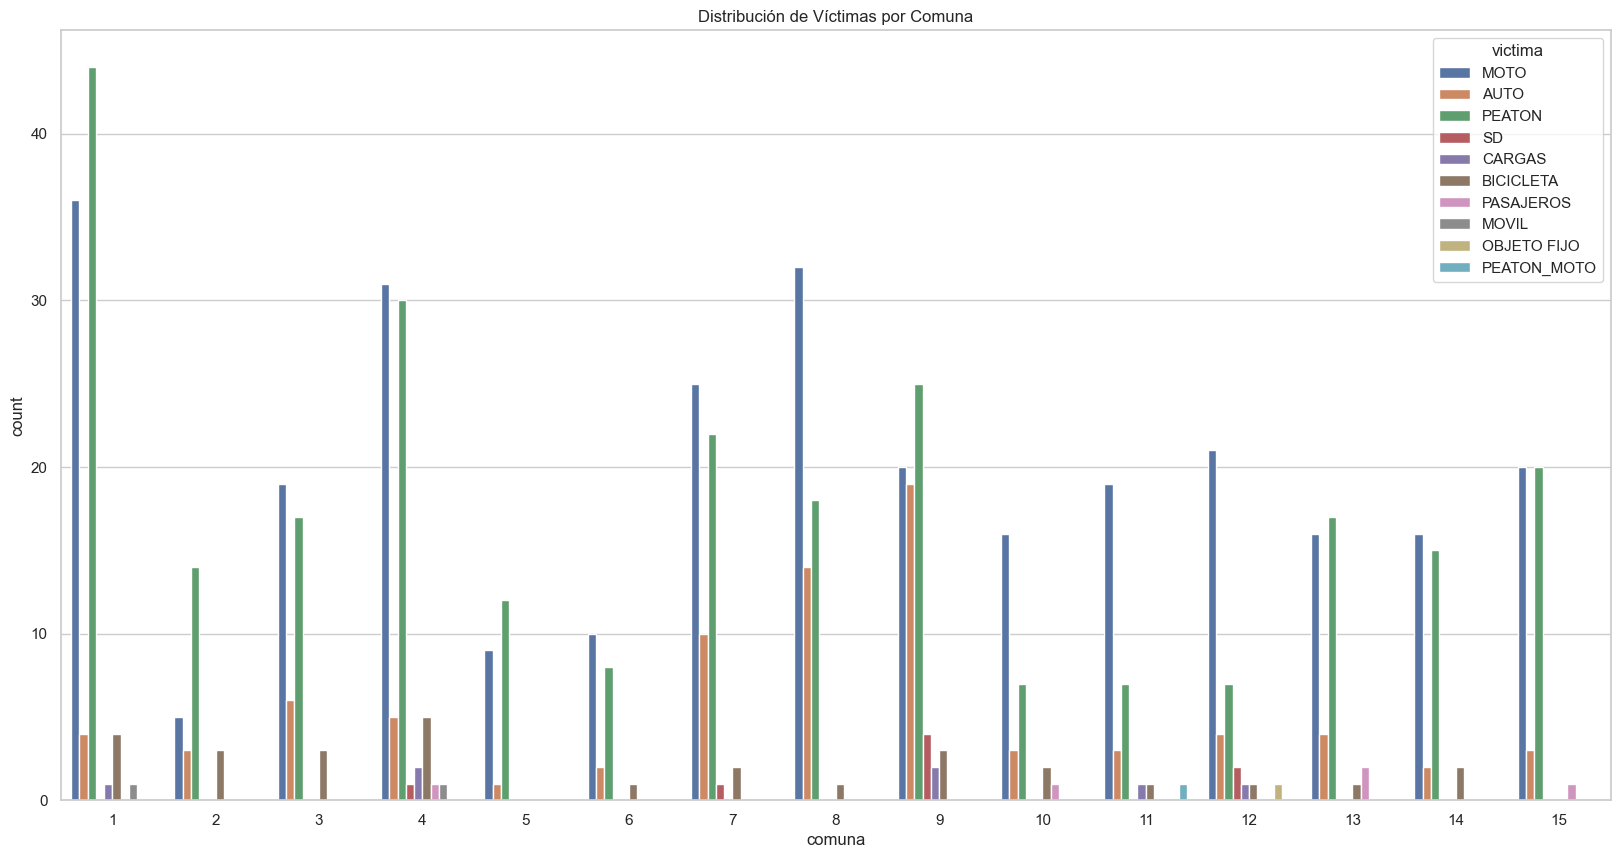

In [69]:
plt.figure(figsize=(20, 10))
sns.countplot(x='comuna', data=hechos, hue='victima')
plt.title('Distribución de Víctimas por Comuna')
plt.show()

Se grafican las victimas de siniestros viales por comuna filtrando de acuerdo al medio de transporte utilizado al momento del accidente. Se observa un patrón en todas las comunas sobre las victimas en moto y las victimas que son peatones.

In [70]:
# Se ubican los registros sin datos en las columnas 'participantes', 'victima' y 'acusado'
participante_sd = hechos['participantes'].str.contains('SD').sum()
victima_sd = hechos['victima'].str.contains('SD').sum()
acusado_sd = hechos['acusado'].str.contains('SD').sum()

print(f'Se encontraron {participante_sd} campos vacios en la columna participantes'),
print(f'Se encontraron {victima_sd} campos vacios en la columna victima'),
print(f'Se encontraron {acusado_sd} campos vacios en la columna acusado')

Se encontraron 25 campos vacios en la columna participantes
Se encontraron 8 campos vacios en la columna victima
Se encontraron 21 campos vacios en la columna acusado


Luego de realizar un analisis de las columnas 'participantes', 'victima' y 'acusado', se considera que son columnas que poseen datos relevantes para el objetivo del proyecto, por lo que posteriormente se podrían cruzar datos con el dataframe 'victimas', exceptuando 'acusados', para intentar completar los campos faltantes

In [71]:
hechos.dtypes

id                               object
n_victimas                        int64
fecha                    datetime64[ns]
aaaa                              int64
mm                                int64
dd                                int64
hora                             object
hh                               object
lugar_del_hecho                  object
tipo_de_calle                    object
calle                            object
altura                           object
cruce                            object
dirección_normalizada            object
comuna                            int64
xy_(caba)                        object
pos_x                            object
pos_y                            object
participantes                    object
victima                          object
acusado                          object
dtype: object

Luego de observar la información provista por el metodo dtypes se observa que:
- HH debería castearse a int
- Altura esta como float, debería castearse a int
- Comuna esta como int, debería castearse a object o category


In [72]:
# Se verifica si hay duplicados en el dataset
hechos.duplicated().any()

False

In [79]:
hechos[['n_victimas']].value_counts()

n_victimas
1             674
2              19
3               1
Name: count, dtype: int64

In [ ]:
hechos['n_victimas'].describe()

count    694.000000
mean       1.030259
std        0.179644
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: n_victimas, dtype: float64

Se observa que del total de 694 victimas registradas, la media de victimas por siniestro vial es de 1 y la maxima 3.

Se procede a reaalizar un histograma para graficar la distribución de los datos.

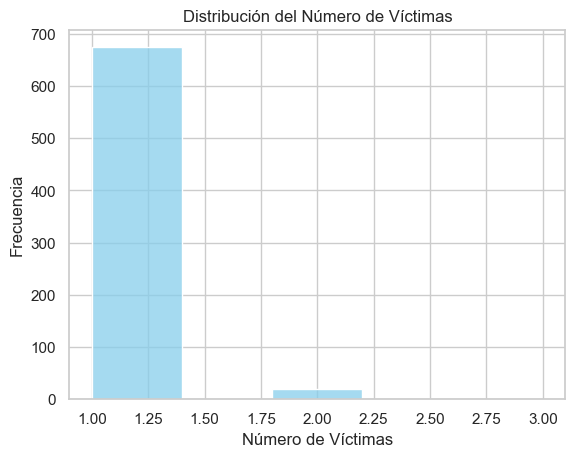

In [ ]:
# Se configura el estilo de Seaborn
sns.set(style="whitegrid")

# Se crea un histograma
sns.histplot(data=hechos, x='n_victimas', bins=5, color='skyblue')

# Se añaden etiquetas y título
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Víctimas')

# Se muestra el gráfico
plt.show()

In [ ]:
print(round(hechos['n_victimas'].value_counts(normalize=True) * 100,2))

n_victimas
1    97.12
2     2.74
3     0.14
Name: proportion, dtype: float64


Tras graficar la frecuencia del numero de victimas, se realiza un calculo porcentual donde se observa que en un 97% de los casos el numero de victimas en los siniestros viales registrados es de 1.

In [ ]:
# Se verifica la frecuencia de los valores dentro de la columna 'tipo_de_calle'
print(hechos['tipo_de_calle'].value_counts())

tipo_de_calle
AVENIDA      429
CALLE        135
GRAL PAZ      65
AUTOPISTA     65
Name: count, dtype: int64


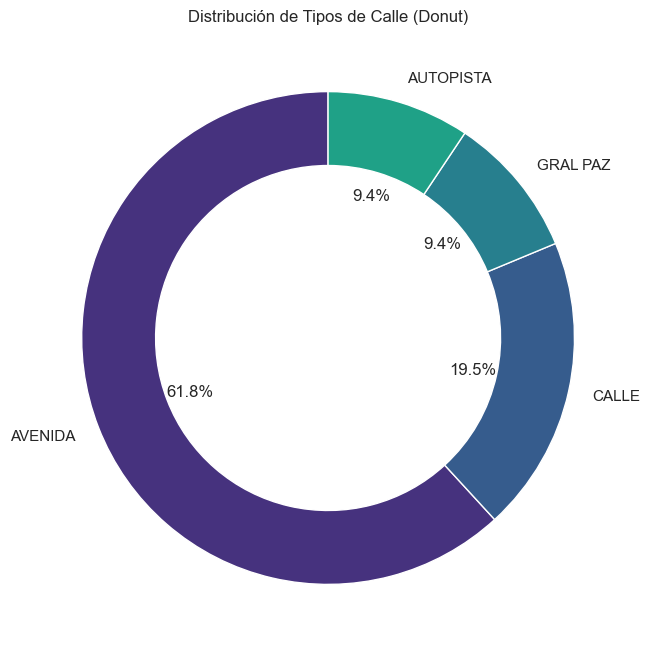

In [ ]:
# Se almacena la frecuencia de cada tipo de calle
frecuencia_tipo_calle = hechos['tipo_de_calle'].value_counts()

# Se configura el estilo de Seaborn 
sns.set(style="whitegrid")

# Se crea un gráfico de donut
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_tipo_calle, labels=frecuencia_tipo_calle.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'), wedgeprops=dict(width=0.3))
plt.title('Distribución de Tipos de Calle')

# Se muestra el gráfico
plt.show()

Al analizar el grafico de dona obtenido sobre la columna 'tipo_de_calle' se puede observar que el mayor porcentaje de siniestros viales suceden en avenidas de CABA. 

In [ ]:
hechos['aaaa'].value_counts()

aaaa
2018    143
2016    142
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64

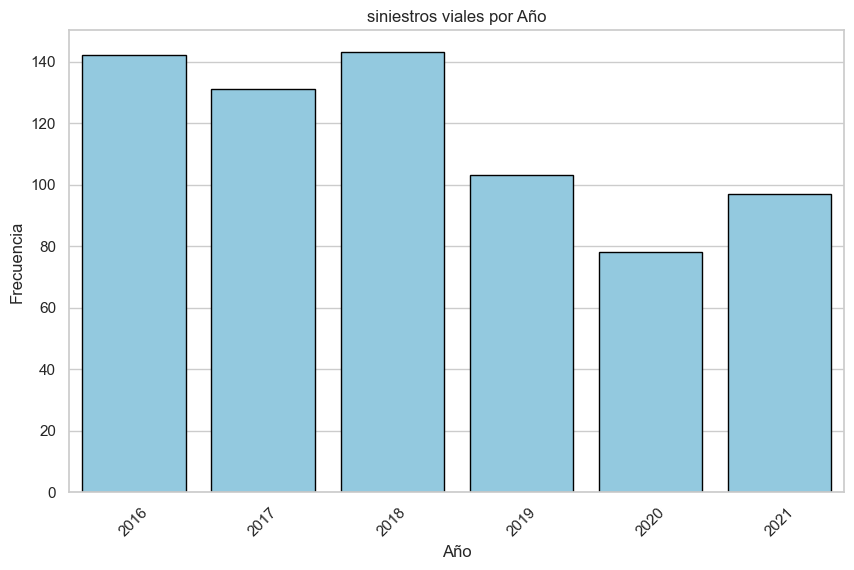

In [ ]:
# Se configura el estilo de Seaborn 
sns.set(style="whitegrid")

# Se crea un gráfico de barras con la columna de años
plt.figure(figsize=(10, 6))
sns.countplot(data=hechos, x='aaaa', color='skyblue', edgecolor='black')

# Se añade etiquetas y título
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('siniestros viales por Año')

# Se rota etiquetas del eje x para mayor legibilidad (opcional)
plt.xticks(rotation=45)

# Se muestra el gráfico
plt.show()

Al analizar el gráfico de barras se observa una baja considerable en los casos entre el 2019 y 2021. Al profundizar en internet, se han encontrado campañas de concientización de diversos sectores, por ejemplo la ONG "Luchemos por la vida", en el rango comprendido entre 2016 y 2021, ha realizado campañas de tv promoviendo evitar la utilización del celular al volante o a dar prioridad a peatones. Tambien se han hallado registros de un plan de seguridad vial 2016-2019 realizado por la Ciudad Autonoma de Buenos Aires, el cual registra una de las cifras más bajas de victimas fatales en siniestros viales de la ultima decada. Para este ultimo caso hay que tener en cuenta que durante el periodo 2019 a 2021 tanto CABA como el resto del mundo estaba siendo atravesado por el fenomeno de la Pandemia COVID-19, declarando estado de cuarentena, limitando la movilidad y el traslado de grandes distancias, lo que podría incidir significativamente en la reducción de siniestros viales.

#### VICTIMAS

Se procede a revisar victimas

In [ ]:
# Se revisan datos nulos
victimas.isna().any()

id_hecho               False
fecha                  False
aaaa                   False
mm                     False
dd                     False
rol                    False
victima                False
sexo                   False
edad                   False
fecha_fallecimiento    False
dtype: bool

In [ ]:
# Se verifican duplicados
victimas.duplicated().sum()

0

In [ ]:
victimas.dtypes

id_hecho                       object
fecha                  datetime64[ns]
aaaa                            int64
mm                              int64
dd                              int64
rol                            object
victima                        object
sexo                           object
edad                           object
fecha_fallecimiento            object
dtype: object

In [ ]:
victimas['edad'].value_counts()

edad
SD    52
30    28
29    24
23    24
27    20
      ..
11     1
13     1
85     1
7      1
88     1
Name: count, Length: 86, dtype: int64

Se observa una gran cantidad de valores SD (sin dato) por lo que serán reemplazados por el valor -1 para poder trabajar con los datos.

In [ ]:
# Se reemplaza "SD" con -1 en la columna "edad"
victimas['edad'] = victimas['edad'].replace('SD', '-1')

# Se castea la columna a tipo entero
victimas['edad'] = victimas['edad'].astype(int, errors='ignore')

In [ ]:
victimas['edad'].value_counts()

edad
-1     52
 30    28
 29    24
 23    24
 27    20
       ..
 11     1
 13     1
 85     1
 7      1
 88     1
Name: count, Length: 86, dtype: int64

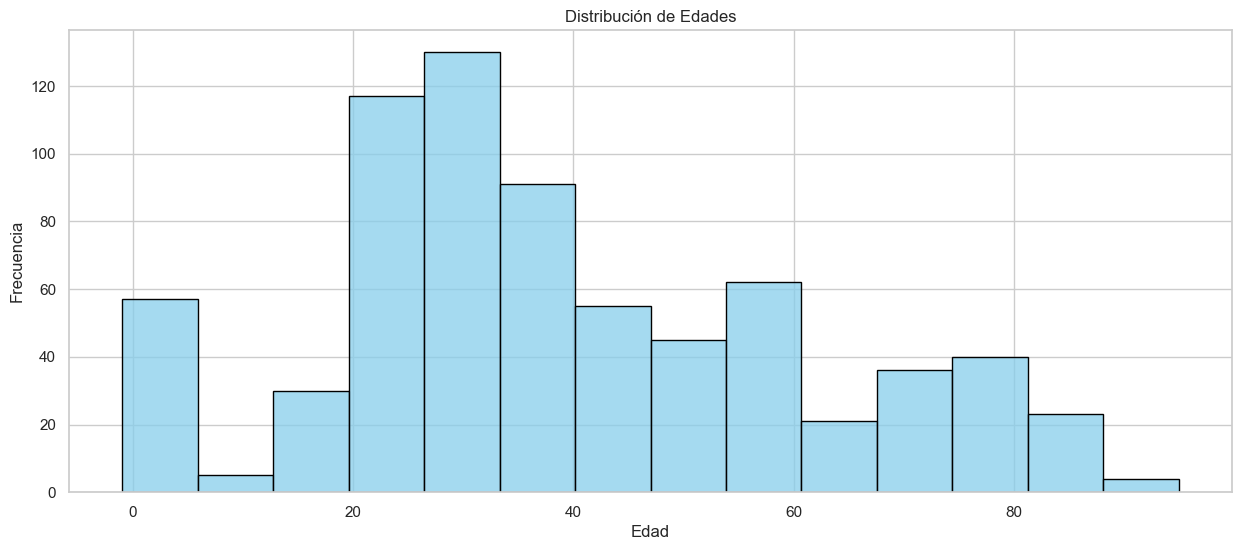

In [ ]:
# Se configura el estilo de Seaborn
sns.set(style="whitegrid")

# Se crea un gráfico de barras para mostrar todas las edades
plt.figure(figsize=(15, 6))
sns.histplot(data=victimas, x='edad', kde=False, color='skyblue', edgecolor='black')

# Se añade etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Siniestros por Edades')

# Se muestra el gráfico
plt.show()

In [ ]:
victimas['rol'].value_counts()

rol
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       10
Name: count, dtype: int64

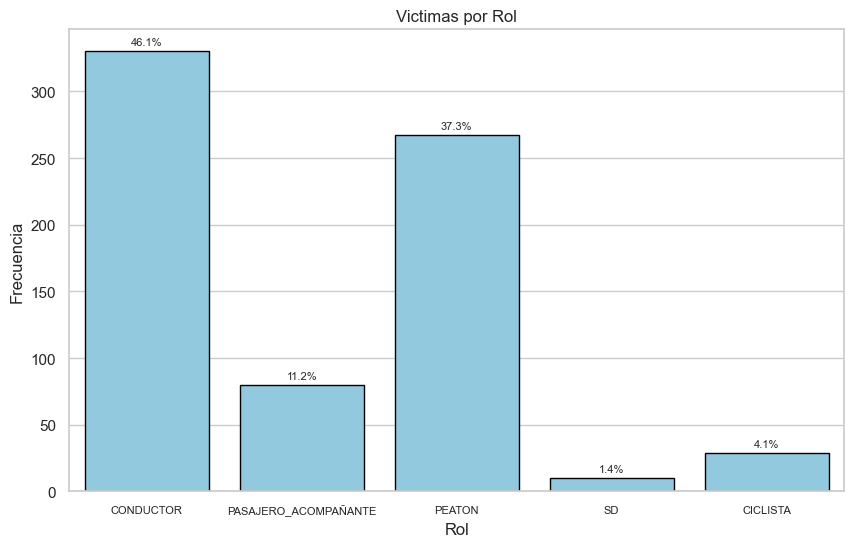

In [ ]:
# Se configura el estilo de Seaborn
sns.set(style="whitegrid")

# Se crea un gráfico de barras con la columna de años
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=victimas, x='rol', color='skyblue', edgecolor='black')

# Se añaden etiquetas y título
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.title('Victimas por Rol')

# Se rotan las etiquetas del eje x para mayor legibilidad (opcional)
plt.xticks(rotation=0)

# Se cambia el tamaño de las etiquetas del eje x
plt.xticks(fontsize=8)

# Se agregan porcentajes o números sobre las barras
total_barras = len(victimas['rol'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total_barras:.1%}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),  # Ajuste vertical del texto
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Se muestra el gráfico
plt.show()

In [ ]:
victimas['victima'].value_counts()

victima
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
SD             8
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64

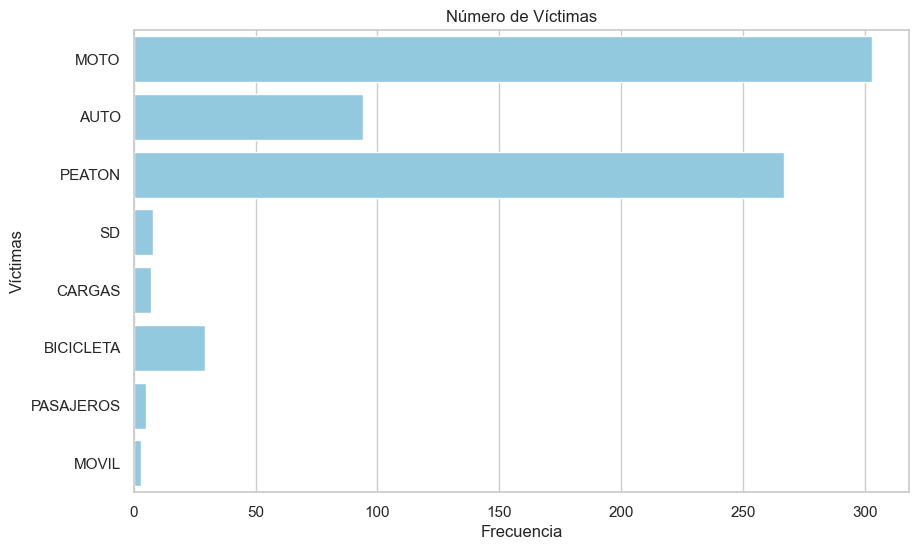

In [ ]:
# Se configura el estilo de Seaborn
sns.set(style="whitegrid")

# Se crea un gráfico de barras horizontal con la columna "victimas" de un solo color
plt.figure(figsize=(10, 6))
sns.countplot(data=victimas, y='victima', color='skyblue')  # Puedes cambiar 'lightblue' por el color que desees

# Se añade etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Víctimas')
plt.title('Número de Víctimas')

# Se muestra el gráfico
plt.show()

In [ ]:
victimas['sexo'].value_counts()

sexo
MASCULINO    545
FEMENINO     166
SD             5
Name: count, dtype: int64

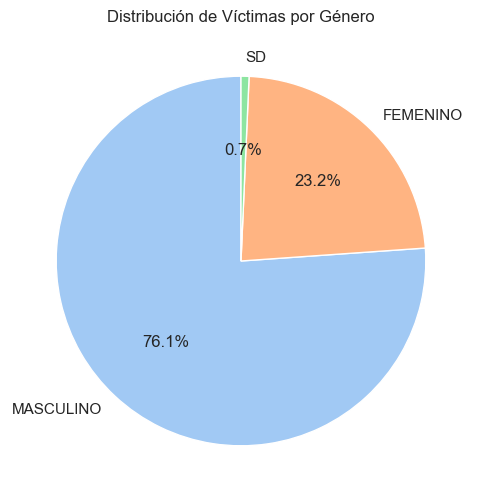

In [ ]:
# Se configura el estilo de Seaborn
sns.set(style="whitegrid")

# Se crea un gráfico de torta con la columna de sexo
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')  # Puedes ajustar la paleta de colores si lo deseas
plt.pie(victimas['sexo'].value_counts(), labels=victimas['sexo'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)

# Se añade título
plt.title('Distribución de Víctimas por Género')

# Se muestra el gráfico
plt.show()

Una vez que se tiene un panorama sobre los datos que se encuentran en 

## Cruzando datos entre el dataframe Hechos y el dataframe Victimas

In [ ]:
hechos['dirección_normalizada'].value_counts()

dirección_normalizada
27 DE FEBRERO AV. y ESCALADA AV.                         5
PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.                4
PAZ, GRAL. AV. y DEL LIBERTADOR AV.                      4
DEL LIBERTADOR AV. y RAMOS MEJIA, JOSE MARIA, DR. AV.    3
ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO           3
                                                        ..
ARANGUREN, JUAN F., DR. 611                              1
AUTOPISTA PERITO MORENO y AUTOPISTA 25 DE MAYO           1
CHORROARIN y SAN MARTIN AV.                              1
COSQUIN y ROCA, CNEL. AV.                                1
PADRE CARLOS MUGICA 709                                  1
Name: count, Length: 641, dtype: int64

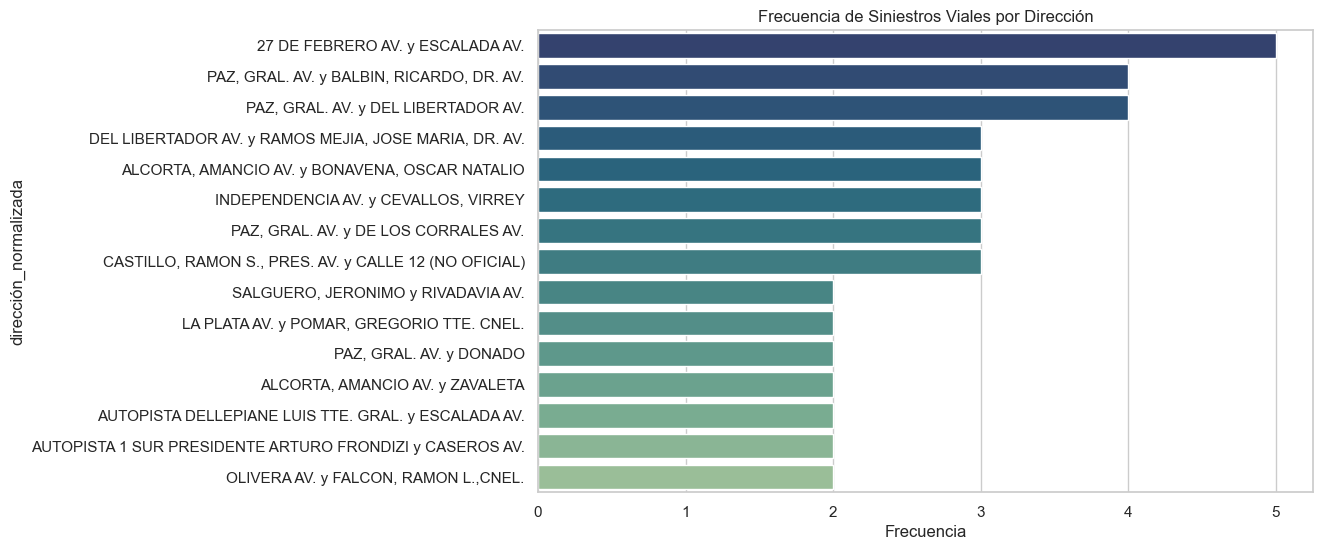

In [ ]:
direcciones_repetidas = hechos['dirección_normalizada'].value_counts().reset_index()
direcciones_repetidas.columns = ['dirección_normalizada', 'Frecuencia']

# Se configura el estilo de Seaborn 
sns.set(style="whitegrid")

# Se crea un gráfico de barras horizontal con paleta invertida
plt.figure(figsize=(10, 6))
sns.barplot(data=direcciones_repetidas.head(15), x='Frecuencia', y='dirección_normalizada', palette='crest_r')

# Se añade etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('dirección_normalizada')
plt.title('Frecuencia de Siniestros Viales por Dirección')

# Se muestra el gráfico
plt.show()

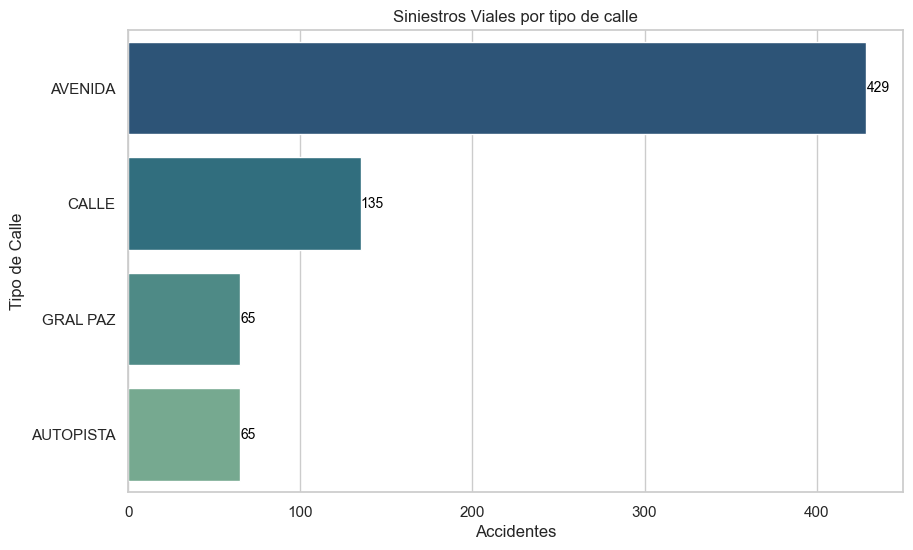

In [ ]:
# Se obtiene la frecuencia y los tipos de calles
direcciones_repetidas = hechos['tipo_de_calle'].value_counts().reset_index()
direcciones_repetidas.columns = ['tipo_de_calle', 'Frecuencia']

# Se configura el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Se crea un gráfico de barras horizontal con paleta invertida
plt.figure(figsize=(10, 6))
grafico = sns.barplot(data=direcciones_repetidas, x='Frecuencia', y='tipo_de_calle', palette='crest_r')

# Se agregan etiquetas y título
plt.xlabel('Accidentes')
plt.ylabel('Tipo de Calle')
plt.title('Siniestros Viales por tipo de calle')

# Se agregan cantidades numéricas en las barras
for index, value in enumerate(direcciones_repetidas['Frecuencia']):
    grafico.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

# Se muestra el gráfico
plt.show()

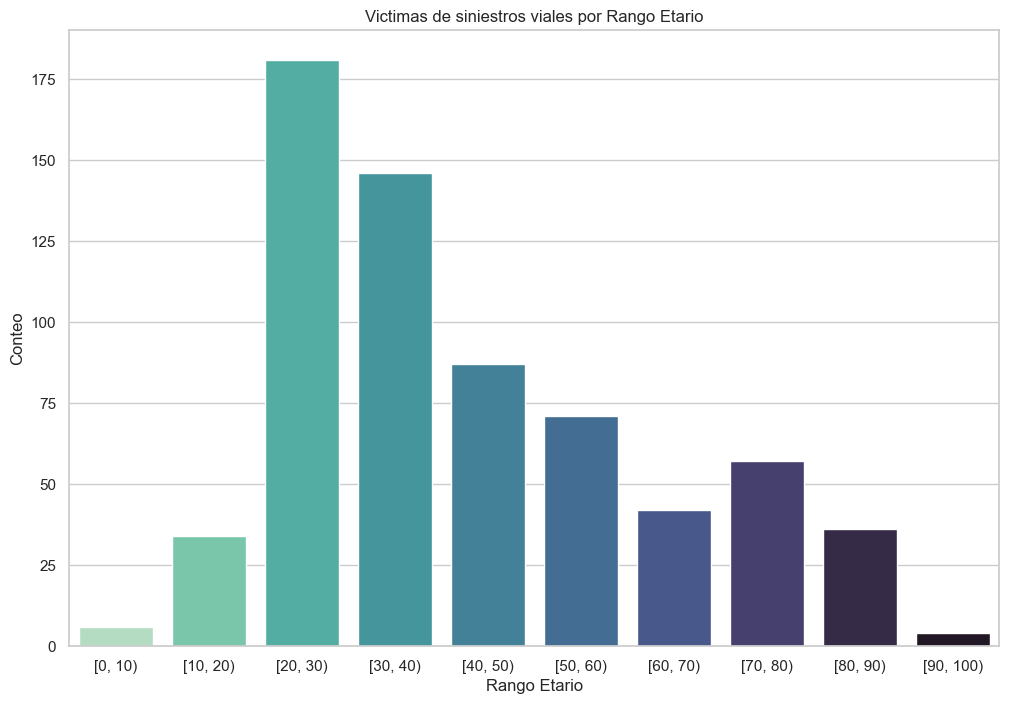

In [ ]:
# Se filtra la edad -1
victimas_filtrado = victimas[victimas['edad'] != -1]

# Se crea el gráfico de barras
plt.figure(figsize=(12, 8))
sns.countplot(data=victimas_filtrado, x=pd.cut(victimas_filtrado['edad'], bins=range(0, 101, 10), right=False), palette='mako_r')

# Se añaden etiquetas y título
plt.xlabel('Rango Etario')
plt.ylabel('Conteo')
plt.title('Victimas de siniestros viales por Rango Etario')

# Se muestra el gráfico
plt.show()

La mayor cantidad de victimas de siniestros viales se encuentran en un rango etario de entre 20 y 30 años. A partir de este pico se distingue una tendencia descendente en la medida en la que aumenta el rango etario.

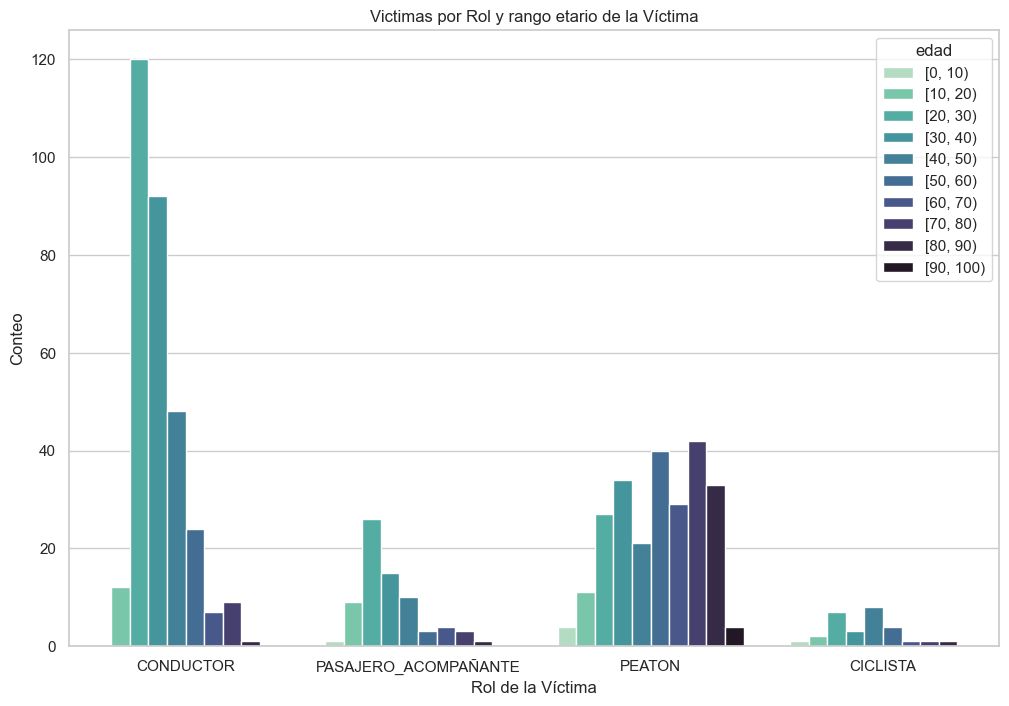

In [ ]:
# Se filtra la edad -1 y el dato 'SD' de la columna 'rol'
victimas_filtrado = victimas[(victimas['edad'] != -1) & (victimas['rol'] != 'SD')]

# Se crea el gráfico de barras agrupando las edades en orden ascendente de 10 en 10
plt.figure(figsize=(12, 8))
sns.countplot(data=victimas_filtrado, x='rol', hue=pd.cut(victimas_filtrado['edad'], bins=range(0, 101, 10), right=False), palette='mako_r')

# Se añade etiquetas y título
plt.xlabel('Rol de la Víctima')
plt.ylabel('Conteo')
plt.title('Victimas por Rol y rango etario de la Víctima')

# MSe muestra el gráfico
plt.show()  

Se observa en el histograma creado al cruzar el rol de la victima con su edad, que hay una gran brecha etaria en los conductores, el mayor numero de siniestros viales son protagonizados por conductores adultos que van desde 20 a 40 años.

 Por otro lado en roles como peaton la distribución es mas pareja y no hay un patrón distinguible de acuerdo a la edad. 

Siendo que el grupo de conductores de 20 a 30 años es el que registra mayores valores de siniestros viales, el rango etario debería ser tomado en cuenta al momento de tomar medidas de seguridad vial.

In [ ]:
# Se agrupan las victimas por hora
hechos_xHora = hechos.groupby("hh")["n_victimas"].sum().reset_index()

# Se elimina el indice 24 por tener un dato nulo que no aporta al analisis
hechos_xHora = hechos_xHora.drop(24)

# Se ordenan los valores en orden descendente 
hechos_xHora.sort_values(by="hh", inplace=True, ascending=True)

# Se reinicia el indice
hechos_xHora.reset_index(drop=True, inplace=True)
hechos_xHora

,hh,n_victimas
0,0,22
1,1,25
2,2,18
3,3,26
4,4,27
5,5,39
6,6,42
7,7,43
8,8,31
9,9,37


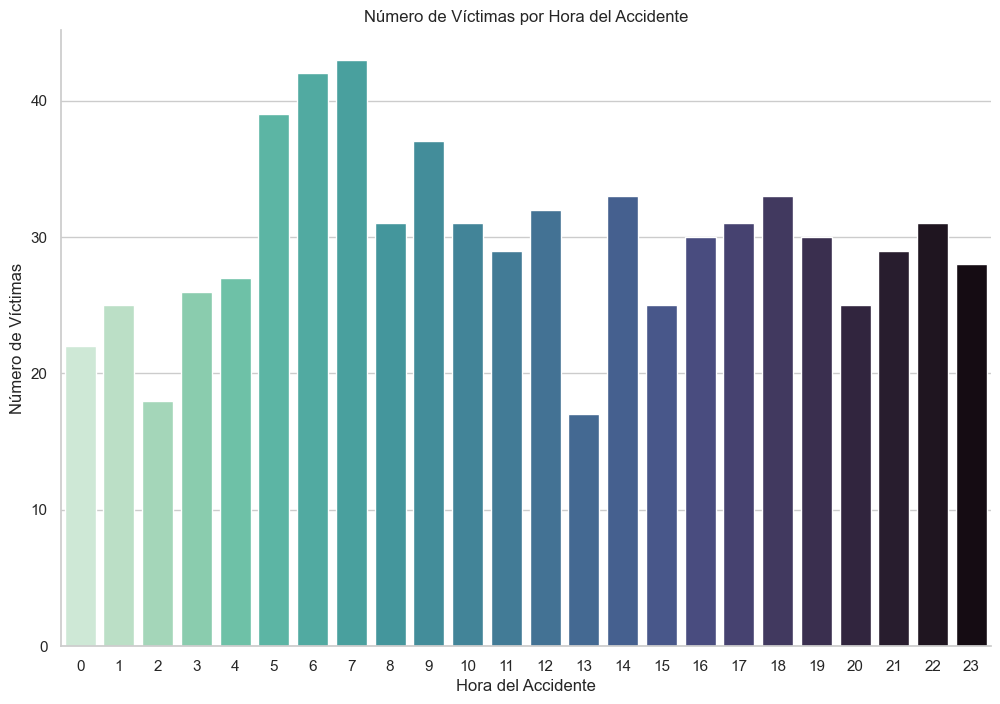

In [ ]:
# Se ajusta el tamaño del grafico
plt.figure(figsize=(12, 8))

# Se crea el grafico de barras para la distribución de número de víctimas por hora
sns.barplot(data=hechos_xHora, x="hh", y="n_victimas", palette='mako_r')

# Se añaden etiquetas y título
plt.xlabel('Hora del Accidente')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por Hora del Accidente')

# Se rotan las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=0)

# Se ajusta el diseño de las barras
sns.despine()

# Se muestra el gráfico
plt.show()

Al cruzar la cantidad de victimas según la hora del dia, se observa una mayor tasa de siniestros que ocurren entre las 5am y las 9am, estos podrían podrían relacionarse a diferentes factores segun el dia de la semana, en dias laborales 

In [ ]:
# Se obtiene el nombre del día correspondiente a cada fecha
hechos['day'] = hechos['fecha'].dt.day_name()

# Se crea un diccionario con los dias y su traducción
traduccion = {
    'Monday': 'lunes',
    'Tuesday': 'martes',
    'Wednesday': 'miercoles',
    'Thursday': 'jueves',
    'Friday': 'viernes',
    'Saturday': 'sabado',
    'Sunday': 'domingo'
}

# Se mapean los nombres de los días traducidos
hechos['dia'] = hechos['day'].map(traduccion)

# Se elimina la columna 'day'
hechos = hechos.drop('day', axis=1)

hechos

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,cruce,dirección_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado,dia
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,viernes
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,sabado
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,SD,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,domingo
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,domingo
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,jueves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,lunes
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,lunes
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,jueves
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,SD,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,miercoles


In [ ]:
hechos['dia'].value_counts()

dia
lunes        106
sabado       103
domingo       99
miercoles     98
martes        98
viernes       96
jueves        94
Name: count, dtype: int64

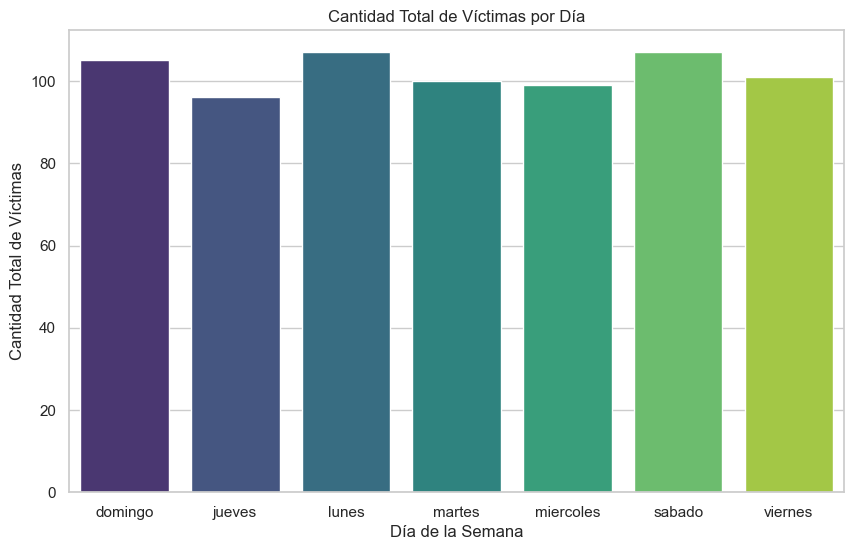

In [ ]:
# Contar la cantidad total de víctimas por día
conteo_victimas_por_dia = hechos.groupby('dia')['n_victimas'].sum().reset_index()

# Crear el gráfico de barras para la cantidad total de víctimas por día
plt.figure(figsize=(10, 6))
sns.barplot(x='dia', y='n_victimas', data=conteo_victimas_por_dia, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Total de Víctimas')
plt.title('Cantidad Total de Víctimas por Día')

# Mostrar el gráfico
plt.show()

Si  se analizan los siniestros por dia de semana, no se observa una diferencia significativa en la frecuencia en función del dia de la semana.

In [ ]:
# Se agrupan las victimas por acusados
victimas_xAcusado = hechos.groupby("acusado")["n_victimas"].sum().reset_index()

# Se ordenan los valores en orden descendente 
victimas_xAcusado.sort_values(by="n_victimas", inplace=True, ascending=False)

# Se reinicia el indice
victimas_xAcusado.reset_index(drop=True, inplace=True)
victimas_xAcusado

,acusado,n_victimas
0,AUTO,210
1,PASAJEROS,178
2,CARGAS,150
3,OBJETO FIJO,67
4,MOTO,58
5,SD,21
6,MULTIPLE,17
7,BICICLETA,7
8,OTRO,6
9,TREN,1


In [ ]:
hechos['victima'].value_counts()

victima
MOTO           295
PEATON         263
AUTO            83
BICICLETA       29
SD               8
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

In [ ]:
hechos['participantes'].value_counts()

participantes
PEATON-PASAJEROS       105
MOTO-AUTO               83
MOTO-CARGAS             78
PEATON-AUTO             77
MOTO-PASAJEROS          46
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               31
PEATON-MOTO             30
MOTO-MOTO               25
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
PEATON-BICICLETA         5
SD-SD                    4
AUTO-SD                  4
CARGAS-CARGAS            4
PEATON-SD                3
PASAJEROS-PASAJEROS      3
MOTO-OTRO                2
MOTO-BICICLETA           2
SD-AUTO                  2
MOTO-MOVIL               2
CARGAS-OBJETO FIJO       1
CARGAS-AUTO              1
MOVIL-PASAJEROS          1
SD-CARGAS                1
SD-MOTO                  1
MOVIL-CARGAS             1
PASAJEROS-AUTO           1
AUTO-MOVIL               1
CARGAS-PASAJER

In [ ]:
hechos['acusado'].value_counts()

acusado
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              21
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

In [ ]:
hechos[hechos['id'] == '2019-0103']

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,cruce,dirección_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado,dia
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO,miercoles


## Exportación de los Dataframes

Se procede a exportar los dataframes 'Hechos' y 'Victimas' para la creación del Dashboard.

In [ ]:
# Se guardan las tablas Hechos y Victimas como csv para trabajar con PowerBI
hechos.to_csv('Hechos.csv', index=False)

victimas.to_csv('Victimas.csv', index=False)